In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\harishkumardatalab\housing-price-prediction\versions\1


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
print(os.listdir(path))

['Housing.csv']


In [13]:
file_path=os.path.join(path,'Housing.csv')
df=pd.read_csv(file_path)

In [14]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [15]:
print(df.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['mainroad','hotwaterheating','airconditioning','prefarea','guestroom', 'basement','furnishingstatus']
for i in cols:
    df[i]=le.fit_transform(df[i])
    

SIMPLE REGRESSION

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    
x=df[['area']]
y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model1=LinearRegression()
model1.fit(X_train,Y_train)
y_pred1=model1.predict(X_test)


MULTIPLE LINEAR REGRESSION

In [18]:
x1=df.drop(columns=['price'])
y2=df['price']
X1_train,X2_test,Y1_train,Y2_test=train_test_split(x1,y2,test_size=0.2,random_state=0)
model2=LinearRegression()
model2.fit(X1_train,Y1_train)
y_pred2=model2.predict(X2_test)


EVALUATION

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#SIMPLE REGRESSION
mae=mean_absolute_error(Y_test,y_pred1)
mse=mean_squared_error(Y_test,y_pred1)
r2=r2_score(Y_test,y_pred1)
print('SIMPLE REGRESSION')
print(f'MAE:  {mae}\n MSE: {mse}\n R2: {r2}')

#MULTIPLE REGRESSION
mae1=mean_absolute_error(Y2_test,y_pred2)
mse1=mean_squared_error(Y2_test,y_pred2)
r2_1=r2_score(Y2_test,y_pred2)
print('MULTIPLE REGRESSION')
print(f'MAE:  {mae1}\n MSE: {mse1}\n R2: {r2_1}')



SIMPLE REGRESSION
MAE:  1026553.7662016951
 MSE: 1997672371756.0862
 R2: 0.3067292122216638
MULTIPLE REGRESSION
MAE:  716583.439661547
 MSE: 986041803890.027
 R2: 0.6578047592637595


REGRESSION LINE (test_set)

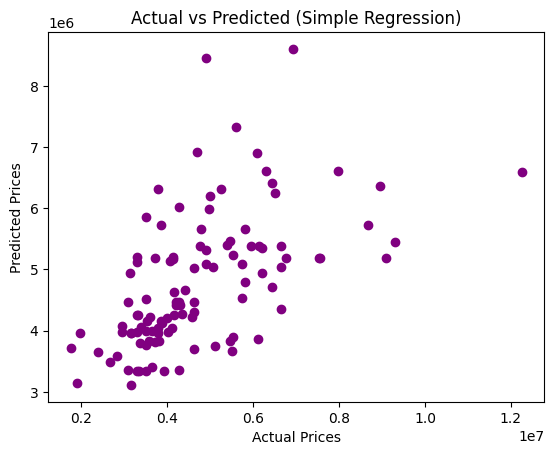

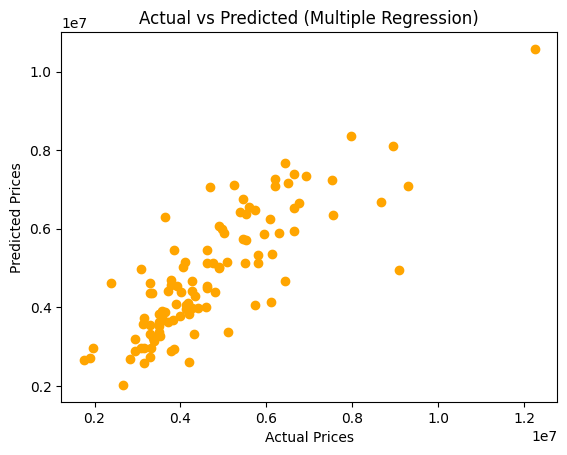

In [21]:
# For simple regression
plt.scatter(Y_test, y_pred1, color='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Simple Regression)")
plt.show()

# For multiple regression (price only)
plt.scatter(Y2_test, y_pred2, color='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Multiple Regression)")
plt.show()


interpret coefficients  and  INTERCEPT

In [22]:
print('Coefficient and intercept of simple regression\n', model1.coef_)     
print(model1.intercept_)
print('Coefficient and intercept of multiple regression\n',model2.coef_)    
print(model2.intercept_)

Coefficient and intercept of simple regression
 [475.26784571]
2329244.913495151
Coefficient and intercept of multiple regression
 [ 2.53732234e+02  1.26430216e+05  1.00306572e+06  4.31159234e+05
  4.34983941e+05  3.95198712e+05  3.30288607e+05  1.20896581e+06
  8.59967238e+05  2.20086777e+05  6.93749764e+05 -2.55656836e+05]
104406.20866453275
